#  Kaggle Study Group - Predict Sales

#### Objetivo: prever vendas no mês por produto e loja  

### 1 - Extração dos Dados 

In [1]:
# import kaggle

In [2]:
# Data fields

#ID - an Id that represents a (Shop, Item) tuple within the test set
#shop_id - unique identifier of a shop
#item_id - unique identifier of a product
#item_category_id - unique identifier of item category
#item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
#item_price - current price of an item
#date - date in format dd/mm/yyyy
#date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
#item_name - name of item
#shop_name - name of shop
#item_category_name - name of item category

In [3]:
#!kaggle competitions download -c competitive-data-science-predict-future-sales -p ~\Desktop\Kaggle_GE

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Acessar os arquivos em csv

#file_item = os.path.join('..','Users','Victor Nakajima','Documents','GitHub','studygroup','kaggle - predict future sales','dataset','items.csv')
#file_train = os.path.join('..','Users','Victor Nakajima','Documents','GitHub','studygroup','kaggle - predict future sales','dataset','sales_train.csv')
#file_test = os.path.join('..','Users','Victor Nakajima','Documents','GitHub','studygroup','kaggle - predict future sales','dataset','test.csv')
#file_categories = os.path.join('..','Users','Victor Nakajima','Documents','GitHub','studygroup','kaggle - predict future sales','dataset','item_categories.csv')
#file_shop = os.path.join('..','Users','Victor Nakajima','Documents','GitHub','studygroup','kaggle - predict future sales','dataset','shops.csv')

In [2]:
data_item= pd.read_csv('items.csv') #item_name; item_id; item_category_id
data_train = pd.read_csv('sales_train.csv') #date; date_block_num; shop_id ;item_id; item_price; item_cnt_day
data_test = pd.read_csv('test.csv') #ID; shop_id; item_id
data_categories = pd.read_csv('item_categories.csv')#item_category_name; item_category_id
data_shop= pd.read_csv('shops.csv') #shop_name; shop_id

### 2 - Análise Explorátoria 

In [3]:
data_train.head(-5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [4]:
# Temos vários valores com (-1)
data_train.item_cnt_day.value_counts()

 1.0      2629372
 2.0       194201
 3.0        47350
 4.0        19685
 5.0        10474
-1.0         7252
 6.0         6338
 7.0         4057
 8.0         2903
 9.0         2177
 10.0        1820
 11.0        1263
 12.0        1083
 13.0         918
 14.0         716
 15.0         638
 16.0         544
 17.0         438
 18.0         391
 20.0         364
 19.0         347
 21.0         290
 22.0         242
 24.0         204
 23.0         198
 25.0         180
 26.0         176
 30.0         147
 28.0         131
 27.0         130
           ...   
 95.0           1
 96.0           1
 102.0          1
 105.0          1
 109.0          1
 112.0          1
 113.0          1
 118.0          1
 128.0          1
 129.0          1
 131.0          1
 132.0          1
 135.0          1
 146.0          1
 200.0          1
 147.0          1
 149.0          1
 153.0          1
 154.0          1
 156.0          1
 157.0          1
 504.0          1
 163.0          1
 164.0          1
 167.0    

In [5]:
data_train.describe() 

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
data_shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [8]:
data_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
data_train.date_block_num.value_counts()

11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64

#### Precisamos agrupar os dias em meses 

In [10]:
data_train_2 = data_train

In [11]:
data_train_2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [12]:
# Agrupar pelo código date_block_num
data_train_3 = data_train_2.groupby(by='date_block_num',as_index=False).sum()

#### tentar plotar gráficos 

In [13]:
data_train_3

,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,0,3417068,1183971787,8.221187e+07,131479.0
1,1,3111582,1076043980,7.558019e+07,128090.0
2,2,4016457,1220911622,8.429831e+07,147142.0
3,3,3164978,971345965,6.151282e+07,107190.0
4,4,3093999,950372988,5.727413e+07,106970.0
5,5,3364700,1047351238,6.334361e+07,125381.0
6,6,3376156,1067060380,6.219681e+07,116966.0
7,7,3510787,1065970958,6.543817e+07,125291.0
8,8,3208314,957871641,7.270157e+07,133332.0
9,9,3101078,966066011,7.391497e+07,127541.0


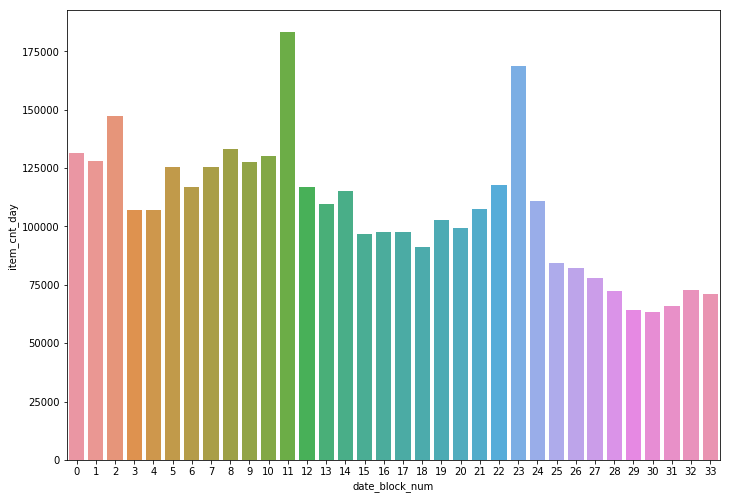

In [14]:
a4_dims = (11.7, 8.27)
fig = plt.subplots(figsize=a4_dims)
sns.barplot(x="date_block_num", y='item_cnt_day',data=data_train_3)

In [15]:
#juntando os items com as categorias
dataset0 = pd.merge(left=data_categories, right=data_item, on="item_category_id")
dataset0.columns

item_category = dataset0[['item_category_name', 'item_name', 'item_category_id', 'item_id']]
item_category.head()

,item_category_name,item_name,item_category_id,item_id
0,PC - Гарнитуры/Наушники,PC: Гарнитура HyperX Cloud Core игровая стерео...,0,5441
1,PC - Гарнитуры/Наушники,Наушники PHILIPS SBC HC8680,0,16255
2,PC - Гарнитуры/Наушники,Наушники RITMIX RH-120,0,16256
3,PC - Гарнитуры/Наушники,Наушники RITMIX RH-124 Black,0,16257
4,Аксессуары - PS2,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,1,5606


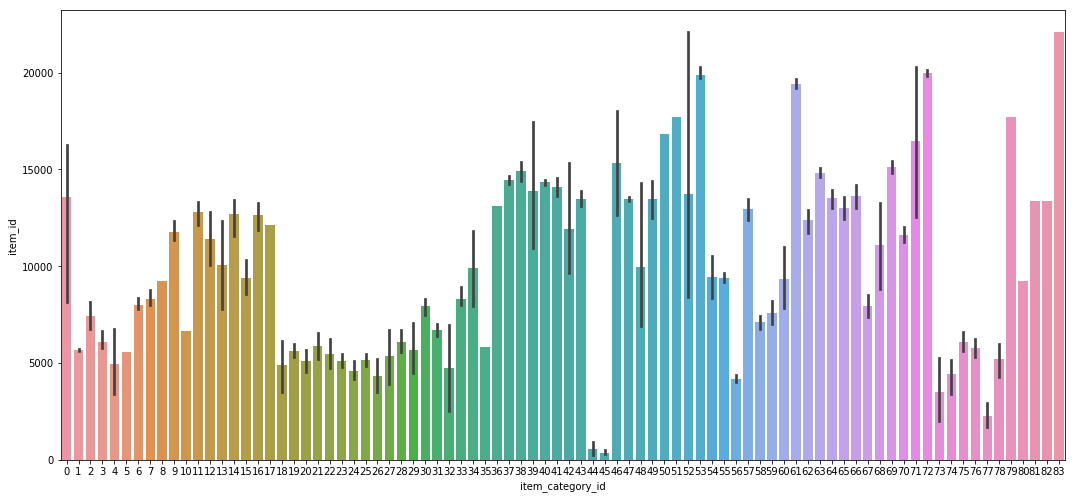

In [16]:
a4_dims = (18, 8.27)
fig = plt.subplots(figsize=a4_dims)
sns.barplot(x="item_category_id", y='item_id',data=item_category)